<a href="https://colab.research.google.com/github/DariiaKhoroshchuk/deep_learning_labs/blob/master/Lab3_Dariia_Khoroshchuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy skimage matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement skimage (from versions: 0.0)
ERROR: No matching distribution found for skimage


In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import layers 
from keras.optimizers import SGD
from keras.utils import to_categorical 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data 
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
#Print the data type of x_train 
print(type(x_train)) 
#Print the data type of y_train 
print(type(y_train)) 
#Print the data type of x_test 
print(type(x_test)) 
#Print the data type of y_test 
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of x_train 
print('x_train shape:', x_train.shape) 
#Get the shapeofy_train 
print('y_train shape:', y_train.shape)
#Get the shapeofx_train 
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape) 

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
index = 0 
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

The image label is:  [6]
The image class is:  frog


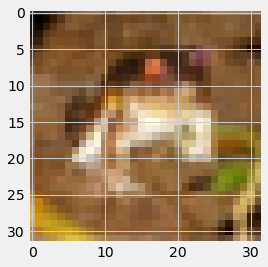

In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Printtheimage class 
print('The image label is: ', y_train[index])
print('The image class is: ', classification[y_train[index][0]])
img = plt.imshow(x_train[index])

In [ ]:
y_train_one_hot = to_categorical(y_train) 
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


**Normalization**

In [ ]:
x_train = x_train / 255 
x_test = x_test / 255

**Model**

In [ ]:
def model_1():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(64, (5, 5), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(250, activation='relu')) 
  model.add(Dense(10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy']) 
  
  return model

In [ ]:
model = model_1()

In [ ]:
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 102s 646ms/step - loss: 1.8286 - accuracy: 0.3152 - val_loss: 1.6090 - val_accuracy: 0.4214
Epoch 2/10
157/157 [==============================] - 89s 569ms/step - loss: 1.4362 - accuracy: 0.4758 - val_loss: 1.3069 - val_accuracy: 0.5326
Epoch 3/10
157/157 [==============================] - 85s 543ms/step - loss: 1.2759 - accuracy: 0.5397 - val_loss: 1.2138 - val_accuracy: 0.5648
Epoch 4/10
157/157 [==============================] - 87s 557ms/step - loss: 1.1530 - accuracy: 0.5899 - val_loss: 1.1420 - val_accuracy: 0.5963
Epoch 5/10
157/157 [==============================] - 85s 541ms/step - loss: 1.0682 - accuracy: 0.6207 - val_loss: 1.0700 - val_accuracy: 0.6169
Epoch 6/10
157/157 [==============================] - 86s 548ms/step - loss: 0.9780 - accuracy: 0.6544 - val_loss: 1.0038 - val_accuracy: 0.6427
Epoch 7/10
157/157 [==============================] - 86s 548ms/step - loss: 0.9095 - accuracy: 0.6793 - val_loss: 0.9943 - val_a

**Test**

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 22ms/step - loss: 0.9451 - accuracy: 0.6761


0.6761000156402588

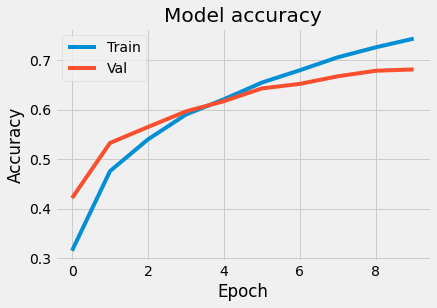

In [ ]:
#Visualize the models accuracy 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show() 

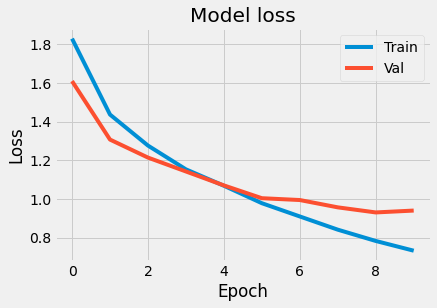

In [ ]:
#Visualize the models loss 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper right') 
plt.show() 

**Test wise data**

Saving photo_2022-11-19_14-19-38(2).jpg to photo_2022-11-19_14-19-38(2) (2).jpg


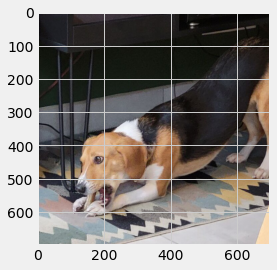

In [ ]:
from google.colab import files
uploaded = files.upload()
# img_path = '/content/' + uploaded
for img in uploaded.keys():
  img_path = '/content/' + img
  new_image = plt.imread(img_path) #Read in the image (3, 14, 20) 
  img_plot = plt.imshow(new_image) 

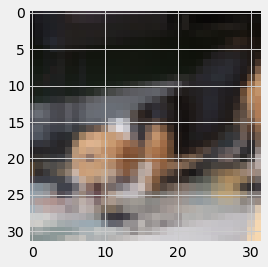

In [ ]:
from skimage.transform import resize 
resized_image = resize(new_image, (32,32,3)) 
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array( [resized_image]))
predictions 

1/1 [==============================] - 0s 21ms/step


array([[0.00162445, 0.01059581, 0.01834026, 0.5336715 , 0.01752616,
        0.33352545, 0.05175776, 0.02333268, 0.00231967, 0.00730629]],
      dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions 
for i in range(10): 
  for j in range(10): 
    if x[0][list_index[i]] > x[0][list_index[j]]: 
      temp = list_index[i] 
      list_index[i] = list_index[j] 
      list_index[j] = temp#Show the sorted labels in orderfromhighest probability to lowest 
  print(list_index) 
  i=0 
for i in range(5): 
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%') 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 1, 0, 3, 4, 5, 6, 7, 8, 9]
[3, 2, 1, 0, 4, 5, 6, 7, 8, 9]
[3, 2, 4, 1, 0, 5, 6, 7, 8, 9]
[3, 5, 2, 4, 1, 0, 6, 7, 8, 9]
[3, 5, 6, 2, 4, 1, 0, 7, 8, 9]
[3, 5, 6, 7, 2, 4, 1, 0, 8, 9]
[3, 5, 6, 7, 2, 4, 1, 8, 0, 9]
[3, 5, 6, 7, 2, 4, 1, 9, 8, 0]
cat : 53.37 %
dog : 33.35 %
frog : 5.18 %
horse : 2.33 %
bird : 1.83 %


Saving photo_2022-10-05_15-59-25.jpg to photo_2022-10-05_15-59-25.jpg


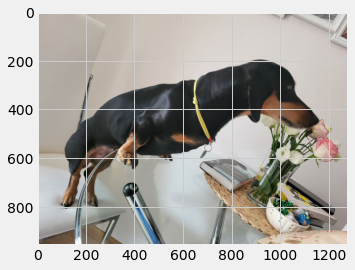

In [ ]:
uploaded = files.upload()
# img_path = '/content/' + uploaded
for img in uploaded.keys():
  img_path = '/content/' + img
  new_image = plt.imread(img_path) #Read in the image (3, 14, 20) 
  img_plot = plt.imshow(new_image) 

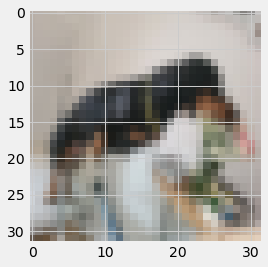

In [ ]:
resized_image = resize(new_image, (32,32,3)) 
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array( [resized_image]))
predictions 

1/1 [==============================] - 0s 82ms/step


array([[6.3431746e-04, 2.5487967e-05, 2.6124693e-02, 1.9255744e-01,
        2.2160304e-03, 7.5822824e-01, 2.2506560e-03, 1.7874718e-02,
        3.8691582e-05, 4.9774306e-05]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions 
for i in range(10): 
  for j in range(10): 
    if x[0][list_index[i]] > x[0][list_index[j]]: 
      temp = list_index[i] 
      list_index[i] = list_index[j] 
      list_index[j] = temp#Show the sorted labels in orderfromhighest probability to lowest 
  print(list_index) 
  i=0 
for i in range(5): 
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%') 

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 0, 1, 3, 4, 5, 6, 7, 8, 9]
[3, 2, 0, 1, 4, 5, 6, 7, 8, 9]
[3, 2, 4, 0, 1, 5, 6, 7, 8, 9]
[5, 3, 2, 4, 0, 1, 6, 7, 8, 9]
[5, 3, 2, 6, 4, 0, 1, 7, 8, 9]
[5, 3, 2, 7, 6, 4, 0, 1, 8, 9]
[5, 3, 2, 7, 6, 4, 0, 8, 1, 9]
[5, 3, 2, 7, 6, 4, 0, 9, 8, 1]
dog : 75.82 %
cat : 19.26 %
bird : 2.61 %
horse : 1.79 %
frog : 0.23 %


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To save this model 
model.save('/content/drive/MyDrive/Colab Notebooks/Lab3/my_model.h5') 

In [ ]:
#To load this model 
from keras.models import load_model 
model = load_model('/content/drive/MyDrive/Colab Notebooks/Lab3/my_model.h5')

**Task 2**

In [ ]:
def plot_hist(hist):
  fig = plt.figure(figsize=(15, 5))
  ax1= fig.add_subplot(1,2,1)
  ax2= fig.add_subplot(1,2,2)
  #Visualize the models accuracy 
  ax1.plot(hist.history['accuracy']) 
  ax1.plot(hist.history['val_accuracy']) 
  ax1.set_title('Model accuracy') 
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch') 
  ax1.legend(['Train', 'Val'], loc='upper left') 

  #Visualize the models loss 
  ax2.plot(hist.history['loss']) 
  ax2.plot(hist.history['val_loss']) 
  ax2.set_title('Model loss') 
  ax2.set_ylabel('Loss') 
  ax2.set_xlabel('Epoch') 
  ax2.legend(['Train', 'Val'], loc='upper right') 

  plt.show() 

In [ ]:
def model_2():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
  model.add(Conv2D(32, (5, 5), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(64, (5, 5), activation='relu')) 
  model.add(Conv2D(64, (5, 5), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(250, activation='relu')) 
  model.add(Dense(10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy']) 
  
  return model

In [ ]:
def model_3():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))) 
  model.add(Conv2D(32, (3, 3), padding='Same', activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (5, 5), activation='relu')) 
  model.add(Conv2D(64, (5, 5), padding='Same', activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # model.add(Conv2D(132, (5, 5), activation='relu')) 
  model.add(Conv2D(132, (5, 5), padding='Same', activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(250, activation='relu')) 
  model.add(Dense(10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy']) 
  
  return model

In [ ]:
def model_4():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))) 
  model.add(Conv2D(32, (3, 3), padding='Same', activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.5))

  model.add(Conv2D(64, (5, 5), activation='relu')) 
  model.add(Conv2D(64, (5, 5), padding='Same', activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  # model.add(Conv2D(132, (, 5), activation='relu')) 
  model.add(Conv2D(132, (7, 7), padding='Same', activation='relu')) 
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(250, activation='relu')) 
  model.add(Dense(10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy']) 
  
  return model

In [ ]:
model2 = model_2()

In [ ]:
hist = model2.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 29ms/step - loss: 1.9486 - accuracy: 0.2560 - val_loss: 1.6555 - val_accuracy: 0.3758
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 1.4792 - accuracy: 0.4539 - val_loss: 1.3640 - val_accuracy: 0.5027
Epoch 3/10
157/157 [==============================] - 4s 23ms/step - loss: 1.2952 - accuracy: 0.5314 - val_loss: 1.2196 - val_accuracy: 0.5574
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 1.1610 - accuracy: 0.5837 - val_loss: 1.1445 - val_accuracy: 0.5890
Epoch 5/10
157/157 [==============================] - 3s 17ms/step - loss: 1.0518 - accuracy: 0.6277 - val_loss: 1.0909 - val_accuracy: 0.6171
Epoch 6/10
157/157 [==============================] - 4s 23ms/step - loss: 0.9709 - accuracy: 0.6563 - val_loss: 0.9972 - val_accuracy: 0.6464
Epoch 7/10
157/157 [==============================] - 3s 17ms/step - loss: 0.9077 - accuracy: 0.6810 - val_loss: 1.0296 - val_accuracy: 0.635

In [ ]:
model2.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 1.0063 - accuracy: 0.6674


0.6674000024795532

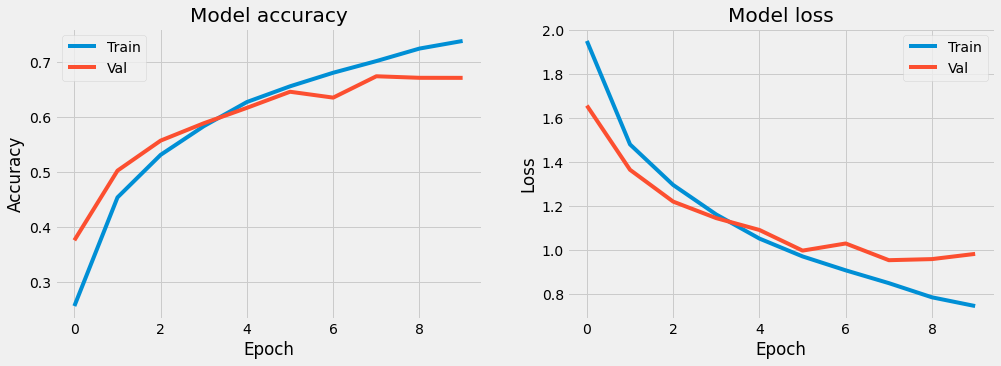

In [ ]:
plot_hist(hist)

In [ ]:
model3 = model_3()

In [ ]:
early_stopping = EarlyStopping(verbose=1, patience=3)

hist = model3.fit(x_train, y_train_one_hot, batch_size=256, epochs=20, callbacks = [early_stopping], validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 16s 28ms/step - loss: 2.0618 - accuracy: 0.1846 - val_loss: 1.8009 - val_accuracy: 0.2919
Epoch 2/20
157/157 [==============================] - 4s 23ms/step - loss: 1.6091 - accuracy: 0.3865 - val_loss: 1.3850 - val_accuracy: 0.4900
Epoch 3/20
157/157 [==============================] - 4s 22ms/step - loss: 1.3229 - accuracy: 0.5190 - val_loss: 1.1889 - val_accuracy: 0.5702
Epoch 4/20
157/157 [==============================] - 4s 25ms/step - loss: 1.1626 - accuracy: 0.5875 - val_loss: 1.0237 - val_accuracy: 0.6309
Epoch 5/20
157/157 [==============================] - 4s 28ms/step - loss: 1.0297 - accuracy: 0.6385 - val_loss: 0.9812 - val_accuracy: 0.6653
Epoch 6/20
157/157 [==============================] - 4s 27ms/step - loss: 0.9314 - accuracy: 0.6774 - val_loss: 0.8552 - val_accuracy: 0.7078
Epoch 7/20
157/157 [==============================] - 4s 23ms/step - loss: 0.8432 - accuracy: 0.7090 - val_loss: 0.8573 - val_accuracy: 0.710

In [ ]:
model3.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.7708 - accuracy: 0.7624


0.7623999714851379

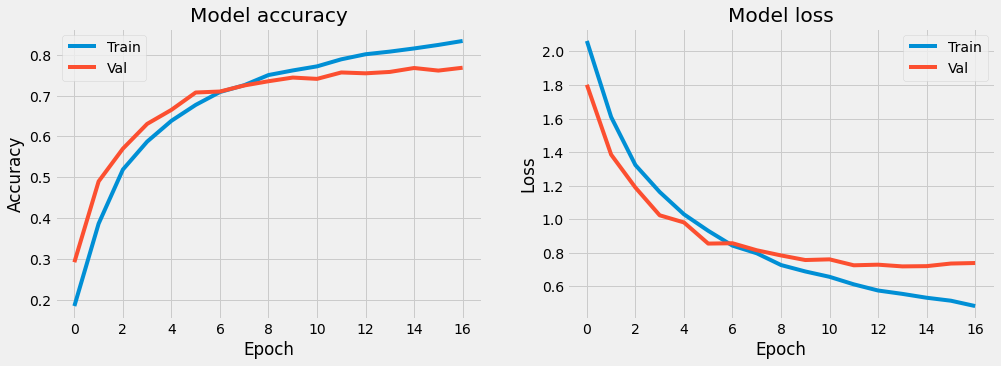

In [ ]:
plot_hist(hist)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To save this model 
model3.save('/content/drive/MyDrive/Colab Notebooks/Lab3/my_model3.h5') 

In [ ]:
#To load this model 
from keras.models import load_model 
model = load_model('/content/drive/MyDrive/Colab Notebooks/Lab3/my_model.h5')

In [ ]:
model4 = model_4()

In [ ]:
early_stopping = EarlyStopping(verbose=1, patience=3)

hist = model4.fit(x_train, y_train_one_hot, batch_size=256, epochs=20, callbacks = [early_stopping], validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 5s 27ms/step - loss: 2.0516 - accuracy: 0.1778 - val_loss: 1.8975 - val_accuracy: 0.2275
Epoch 2/20
157/157 [==============================] - 4s 27ms/step - loss: 1.7825 - accuracy: 0.2946 - val_loss: 1.6030 - val_accuracy: 0.3954
Epoch 3/20
157/157 [==============================] - 4s 27ms/step - loss: 1.5282 - accuracy: 0.4142 - val_loss: 1.3757 - val_accuracy: 0.4910
Epoch 4/20
157/157 [==============================] - 4s 25ms/step - loss: 1.3721 - accuracy: 0.4888 - val_loss: 1.1586 - val_accuracy: 0.5819
Epoch 5/20
157/157 [==============================] - 4s 25ms/step - loss: 1.2565 - accuracy: 0.5469 - val_loss: 1.0939 - val_accuracy: 0.6077
Epoch 6/20
157/157 [==============================] - 4s 25ms/step - loss: 1.1694 - accuracy: 0.5843 - val_loss: 1.0455 - val_accuracy: 0.6273
Epoch 7/20
157/157 [==============================] - 4s 25ms/step - loss: 1.1167 - accuracy: 0.6032 - val_loss: 0.9765 - val_accuracy: 0.6504

In [ ]:
model4.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.7535 - accuracy: 0.7450


0.7450000047683716

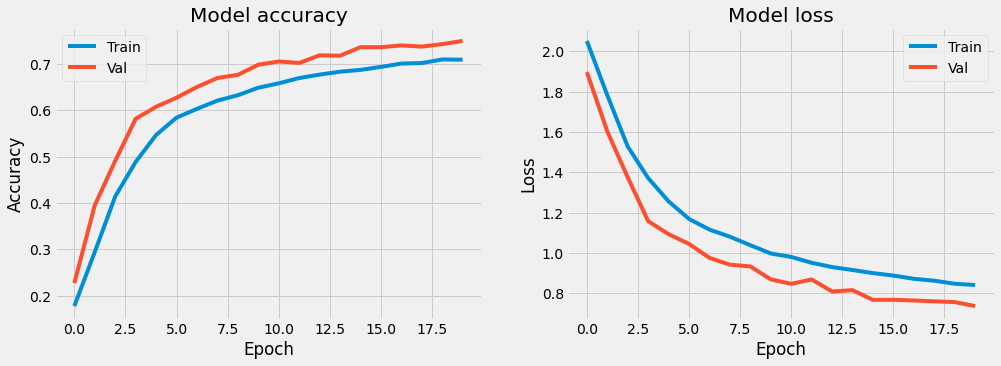

In [ ]:
plot_hist(hist)

**Test wise data**

In [ ]:
from google.colab import files
from skimage.transform import resize

In [ ]:
def image_prediction(model, uploaded):

  for img in uploaded.keys():
    img_path = '/content/' + img
    new_image = plt.imread(img_path) #Read in the image (3, 14, 20) 
    img_plot = plt.imshow(new_image) 
  resized_image = resize(new_image, (32,32,3)) 
  img = plt.imshow(resized_image)

  predictions = model.predict(np.array( [resized_image]))
  
  list_index = [0,1,2,3,4,5,6,7,8,9]
  x = predictions 
  for i in range(10): 
    for j in range(10): 
      if x[0][list_index[i]] > x[0][list_index[j]]: 
        temp = list_index[i] 
        list_index[i] = list_index[j] 
        list_index[j] = temp#Show the sorted labels in orderfromhighest probability to lowest 
    i=0 
  for i in range(5): 
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%') 

Saving airplane.jpg to airplane (1).jpg
1/1 [==============================] - 0s 284ms/step
airplane : 100.0 %
bird : 0.0 %
ship : 0.0 %
cat : 0.0 %
truck : 0.0 %


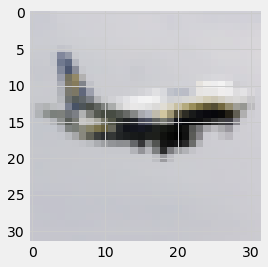

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving automobile.jpg to automobile.jpg
1/1 [==============================] - 0s 25ms/step
automobile : 77.16 %
frog : 13.85 %
truck : 4.46 %
dog : 3.21 %
cat : 0.94 %


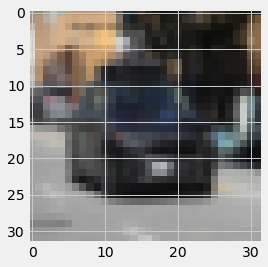

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving bird.jpg to bird (1).jpg
1/1 [==============================] - 0s 21ms/step
bird : 65.56 %
frog : 18.44 %
deer : 14.3 %
airplane : 0.76 %
cat : 0.69 %


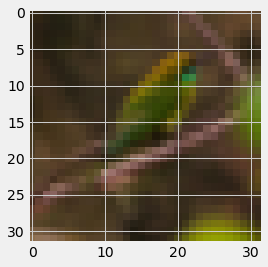

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving cat.jpg to cat.jpg
1/1 [==============================] - 0s 19ms/step
dog : 58.53 %
cat : 39.91 %
horse : 0.5 %
bird : 0.42 %
deer : 0.41 %


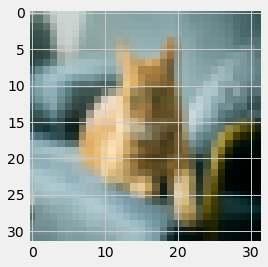

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving deer.jpg to deer.jpg
1/1 [==============================] - 0s 19ms/step
deer : 97.51 %
dog : 1.28 %
cat : 0.74 %
bird : 0.2 %
frog : 0.15 %


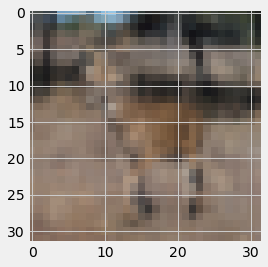

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving dog.jpg to dog.jpg
1/1 [==============================] - 0s 22ms/step
cat : 73.35 %
dog : 25.21 %
horse : 0.79 %
bird : 0.4 %
frog : 0.11 %


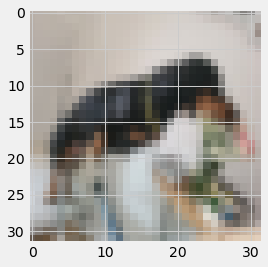

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving frog.jpg to frog.jpg
1/1 [==============================] - 0s 23ms/step
frog : 89.75 %
bird : 8.66 %
deer : 0.99 %
cat : 0.42 %
dog : 0.16 %


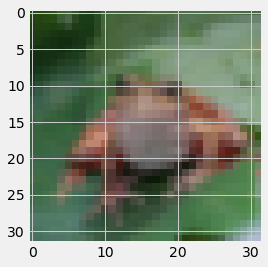

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving horse.jpg to horse.jpg
1/1 [==============================] - 0s 20ms/step
horse : 99.78 %
deer : 0.21 %
dog : 0.01 %
cat : 0.0 %
bird : 0.0 %


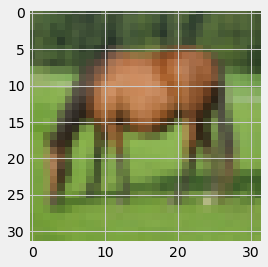

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving ship.jpg to ship.jpg
1/1 [==============================] - 0s 20ms/step
ship : 98.55 %
airplane : 0.65 %
bird : 0.34 %
truck : 0.18 %
cat : 0.12 %


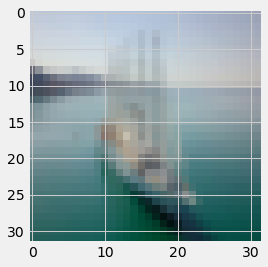

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

Saving truck.jpg to truck.jpg
1/1 [==============================] - 0s 20ms/step
truck : 97.72 %
ship : 1.06 %
airplane : 0.83 %
automobile : 0.31 %
bird : 0.03 %


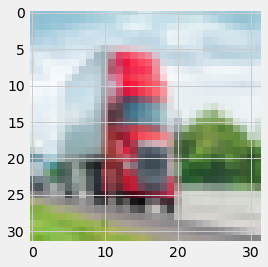

In [ ]:
uploaded = files.upload()

image_prediction(model3, uploaded)

**Task 5**

In [ ]:
def model_5():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='Same', activation='relu', input_shape=(32,32,3))) 
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding='Same', activation='relu')) 
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), padding='Same', activation='relu')) 
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='Same', activation='relu')) 
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), padding='Same', activation='relu')) 
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='Same', activation='relu')) 
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax')) 

  # opt = SGD(lr=0.001, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy']) 
  
  return model

In [ ]:
model5 = model_5()

In [ ]:
early_stopping = EarlyStopping(verbose=1, patience=3)

hist = model5.fit(x_train, y_train_one_hot, batch_size=128, epochs=30, callbacks = [early_stopping], validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 7s 19ms/step - loss: 1.7750 - accuracy: 0.4016 - val_loss: 3.1228 - val_accuracy: 0.1317
Epoch 2/30
313/313 [==============================] - 6s 18ms/step - loss: 1.1945 - accuracy: 0.5716 - val_loss: 1.0566 - val_accuracy: 0.6242
Epoch 3/30
313/313 [==============================] - 5s 17ms/step - loss: 1.0096 - accuracy: 0.6435 - val_loss: 0.9057 - val_accuracy: 0.6774
Epoch 4/30
313/313 [==============================] - 5s 17ms/step - loss: 0.8877 - accuracy: 0.6897 - val_loss: 0.8663 - val_accuracy: 0.6928
Epoch 5/30
313/313 [==============================] - 7s 21ms/step - loss: 0.7986 - accuracy: 0.7192 - val_loss: 0.7755 - val_accuracy: 0.7264
Epoch 6/30
313/313 [==============================] - 6s 18ms/step - loss: 0.7459 - accuracy: 0.7421 - val_loss: 0.7061 - val_accuracy: 0.7540
Epoch 7/30
313/313 [==============================] - 6s 18ms/step - loss: 0.6841 - accuracy: 0.7628 - val_loss: 0.7052 - val_accuracy: 0.7520

In [ ]:
model5.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.6188 - accuracy: 0.8026


0.8026000261306763

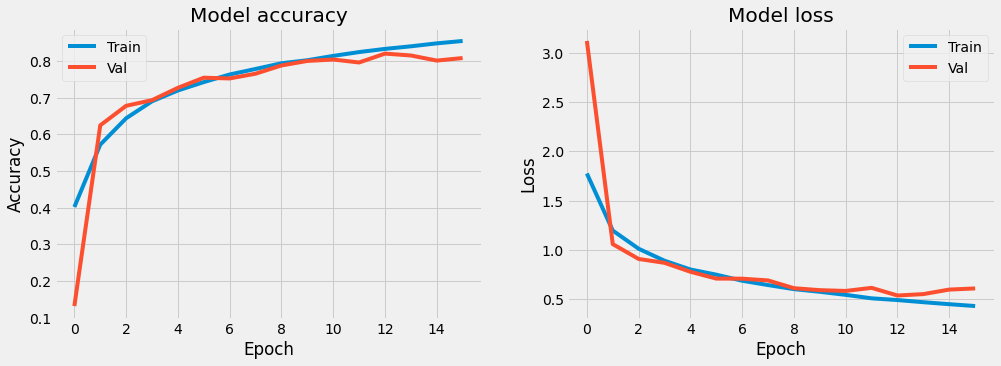

In [ ]:
plot_hist(hist)